In [86]:
import torch
import torch.nn as nn

# =================================================================

N = 256 # size of the array of Function F

# =================================================================

# Activation function for fitting
class F_function(nn.Module):
    """
    Activation function for fitting, works by saving points in a parametrized array
    """
    def __init__(self):
        super(F_function, self).__init__()
        self.force = nn.Parameter(torch.rand(N+1), requires_grad=True)
        
    def forward(self, X):
        """
        does an interpolation, in theory takes the input
        int i = v;
        and tries to do
        return F[v] 
        to find the corresponding value to that ´v´
        """

        if len(X) == 1:
            x, v = X[0], X[1]
        else:
            x, v = X[:,0], X[:,1]

        floor_v = torch.floor(v)
        ceil_v = (floor_v + 1).clamp(max=N) #adresses the overflow problem
        alpha = v - floor_v


        # return torch.tensor([x, (1 - alpha) * self.force[floor_v.int()] + alpha * self.force[ceil_v.int()]])
        return torch.stack([x, (1 - alpha) * self.force[floor_v.int()] + alpha * self.force[ceil_v.int()]]).T



In [85]:
if len(X) == 1:
    x, v = X[0], X[1]
else:
    x, v = X[:,0], X[:,1]

force = nn.Parameter(torch.rand(N+1), requires_grad=True)

floor_v = torch.floor(v)
ceil_v = (floor_v + 1).clamp(max=N) #adresses the overflow problem
alpha = v - floor_v


# return torch.tensor([x, (1 - alpha) * self.force[floor_v.int()] + alpha * self.force[ceil_v.int()]])
forwarding2 = torch.stack([x, (1 - alpha) * force[floor_v.int()] + alpha * force[ceil_v.int()]]).T
forwarding2.shape

torch.Size([202, 2])

In [89]:
f_fun = F_function()
forwarding1 = f_fun.forward(X)
# a,b = forwarding1
w_mat = W_matrix(dt=1e-02)
w_mat.forward(forwarding1)

# forwarding1.shape

tensor([[8.1830e-03, 8.1830e-01],
        [8.0088e-03, 8.0088e-01],
        [7.8344e-03, 7.8344e-01],
        [7.6598e-03, 7.6598e-01],
        [7.4850e-03, 7.4850e-01],
        [7.3100e-03, 7.3100e-01],
        [6.7485e-03, 6.7485e-01],
        [5.9479e-03, 5.9479e-01],
        [5.1463e-03, 5.1463e-01],
        [4.3437e-03, 4.3437e-01],
        [3.5400e-03, 3.5400e-01],
        [3.2864e-03, 3.2864e-01],
        [4.4988e-03, 4.4988e-01],
        [5.7128e-03, 5.7128e-01],
        [6.9284e-03, 6.9284e-01],
        [8.1456e-03, 8.1456e-01],
        [9.3644e-03, 9.3644e-01],
        [8.9579e-03, 8.9579e-01],
        [8.4921e-03, 8.4921e-01],
        [8.0256e-03, 8.0256e-01],
        [7.5584e-03, 7.5584e-01],
        [7.0906e-03, 7.0906e-01],
        [6.5369e-03, 6.5369e-01],
        [5.9449e-03, 5.9449e-01],
        [5.3521e-03, 5.3521e-01],
        [4.7584e-03, 4.7584e-01],
        [4.1638e-03, 4.1638e-01],
        [4.1860e-03, 4.1860e-01],
        [4.9260e-03, 4.9260e-01],
        [5.667

In [63]:
w_mat.forward([a,b])

TypeError: linear(): argument 'input' (position 1) must be Tensor, not list

In [47]:
X.T.size()

torch.Size([2, 202])

In [45]:
X.T[0]

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [39]:
X[:,1].floor().int()

tensor([100, 100, 100, 100, 100, 100, 101, 101, 101, 101, 101, 102, 102, 102,
        102, 102, 102, 103, 103, 103, 103, 103, 104, 104, 104, 104, 104, 105,
        105, 105, 105, 105, 106, 106, 106, 106, 106, 107, 107, 107, 107, 107,
        108, 108, 108, 108, 108, 108, 109, 109, 109, 109, 109, 110, 110, 110,
        110, 110, 111, 111, 111, 111, 111, 112, 112, 112, 112, 113, 113, 113,
        113, 113, 114, 114, 114, 114, 114, 115, 115, 115, 115, 115, 116, 116,
        116, 116, 116, 117, 117, 117, 117, 118, 118, 118, 118, 118, 119, 119,
        119, 119, 119, 120, 120, 120, 120, 121, 121, 121, 121, 121, 122, 122,
        122, 122, 123, 123, 123, 123, 123, 124, 124, 124, 124, 125, 125, 125,
        125, 126, 126, 126, 126, 126, 127, 127, 127, 127, 128, 128, 128, 128,
        129, 129, 129, 129, 130, 130, 130, 130, 130, 131, 131, 131, 131, 132,
        132, 132, 132, 133, 133, 133, 133, 134, 134, 134, 134, 135, 135, 135,
        135, 136, 136, 136, 136, 137, 137, 137, 137, 138, 138, 1

In [20]:
# Example of workings
X = torch.tensor(
    [ [i for i in range(N)] , [i for i in range(N)] ]
    )

print(X.size)
# trainable network of parameters fitting
force = F_function()

# force.forward(X)

<built-in method size of Tensor object at 0x0000020197DFCA90>


its possible to graph the component of this:

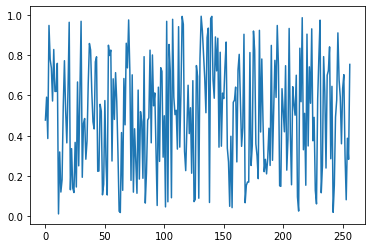

In [21]:
import matplotlib.pyplot as plt

def plot_f(force_parameters):
    # graphing the array inside of this
    force_values = force_parameters.detach().numpy()
    plt.plot(force_values)
    plt.show()

plot_f(force.force)

In [22]:
# lets writte part of a loss function,
# this to smooth the function

def smooth_loss(force_params):
    summatory = 0.0
    for i in range(len(force_params)-1):
        summatory += ( force_params[i+1] - force_params[i] )**2
    return summatory

def physics_constrain(force_params):
    return force_params[0]

smooth_rate = 0.03
constrain_rate = 0.1

L2_loss_by_smoothness = smooth_rate * smooth_loss(force.force) + constrain_rate*physics_constrain(force.force)

# backward propagation
L2_loss_by_smoothness

tensor(1.1502, grad_fn=<AddBackward0>)

In [23]:
L2_loss_by_smoothness.backward()

In [24]:
# ========
# Hyperparameter:
# similar to a learning rate
learning_rate = 0.03
# ========

with torch.no_grad():
    # force.force = = force.force - smooth_rate * force.force.grad
    force.force -= learning_rate * force.force.grad 

# also works:
# force.force.data -= force.force.grad


# clear the gradients so they don't accumulate over multiple backward passes
force.force.grad.zero_();

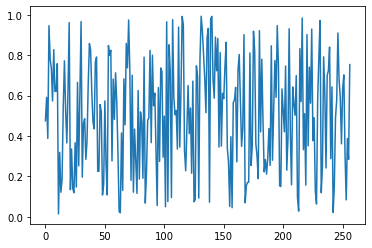

In [25]:
plot_f(force.force)

training with this idea:

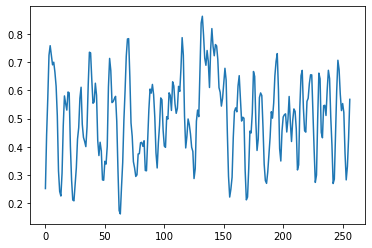

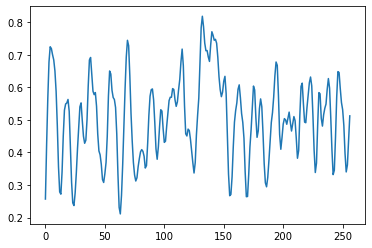

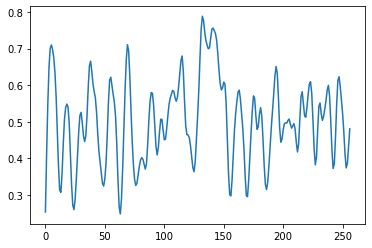

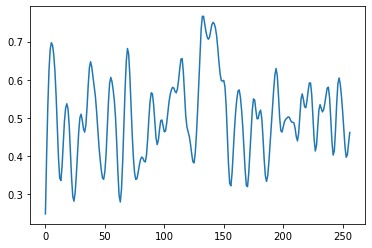

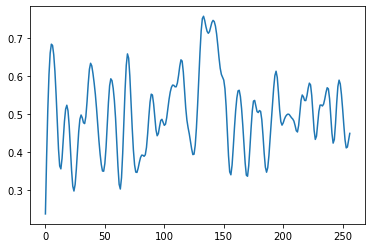

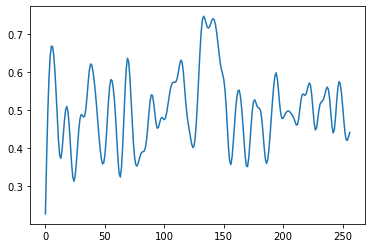

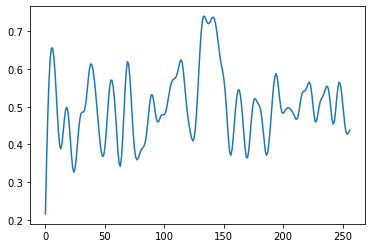

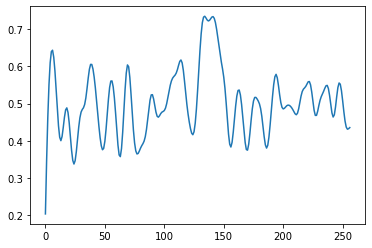

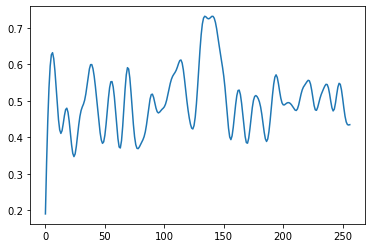

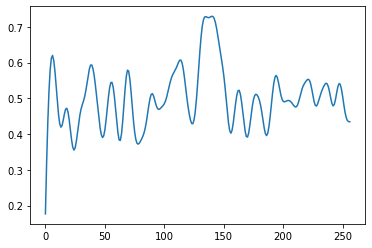

In [27]:

# ========
# Hyperparameter:
# similar to a learning rate
learning_rate = 0.03
n_epochs = 400


smooth_rate = 0.03
constrain_rate = 1


# ========

for epoch in range(n_epochs):
    # here can go a prediction

    # Loss function for smoothness (can be added another to loss)
    L2_loss_by_smoothness = smooth_rate * smooth_loss(force.force) + constrain_rate*physics_constrain(force.force)

    # backward propagation
    L2_loss_by_smoothness.backward()

    with torch.no_grad():
        force.force -= learning_rate * force.force.grad 

    force.force.grad.zero_();

    if (epoch+1) % 30 == 0:
        plot_f(force.force)